In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
tfp = pd.read_csv('TFP.csv')

In [3]:
grouped = tfp.groupby('isocode')

In [4]:
desc = pd.DataFrame()
for isocode, group in grouped:
    d = group.describe()['rtfpna']
    desc = pd.concat((desc, pd.DataFrame(data=d.values, columns=[isocode], index=d.index)), axis=1)
desc

,CAN,MEX,USA
count,62.000000,62.000000,62.000000
mean,0.992886,1.130132,0.803824
std,0.050126,0.158209,0.116121
min,0.843335,0.798159,0.617148
25%,0.973294,1.012231,0.739949
50%,1.004211,1.093859,0.766047
75%,1.029513,1.299591,0.880544
max,1.066104,1.383718,1.020392


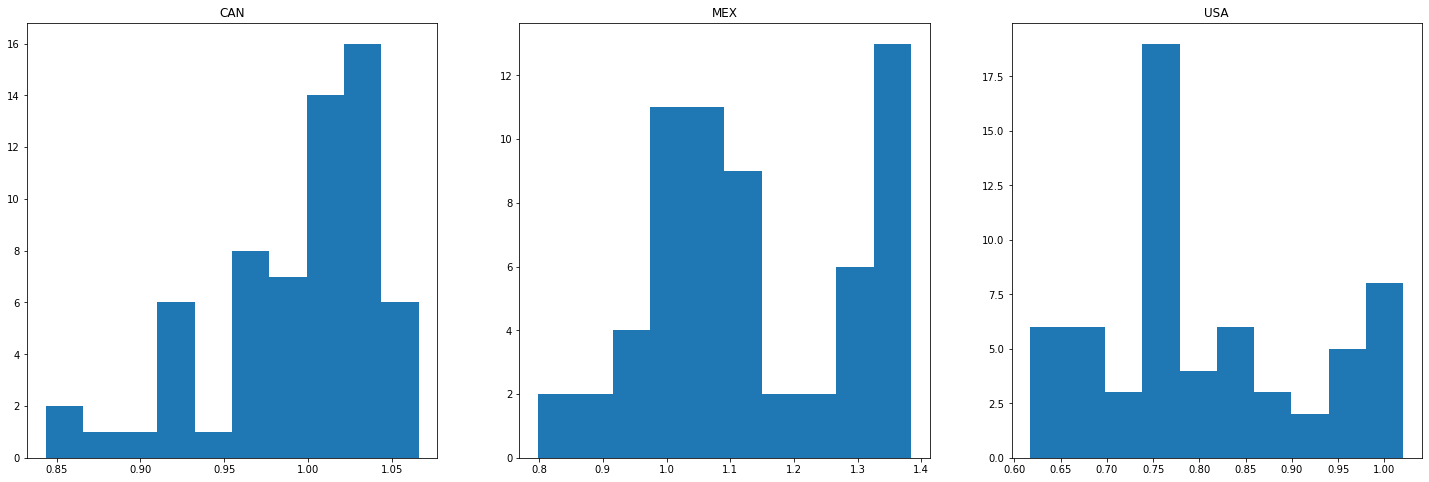

In [5]:
fig, axs = plt.subplots(1, len(grouped), figsize=(25,8))
for (isocode, group), ax in zip(grouped, axs):
    ax.set_title(isocode)
    ax.hist(group['rtfpna'])

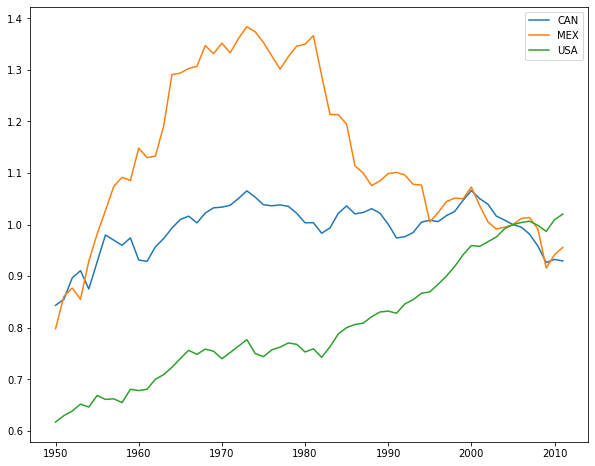

In [6]:
plt.figure(figsize=(10,8))
for isocode, group in grouped:
    plt.plot(group['year'], group['rtfpna'], label=isocode)
plt.legend()
plt.show()

In [7]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [8]:
def model_forecast(model, series, window_size, batch_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [9]:
def split_data(series, test_size=0.2):
    split_point = int(len(series)*(1 - test_size))
    train = series[:split_point]
    test = series[split_point:]
    return train, test, split_point

In [10]:
def build_compile(lr):
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])
    return model

In [14]:
def plot_learning_rate_and_loss(model, train_set, ax, title='', epochs=100):
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(
        lambda epoch: 1e-8 * 10**(epoch / 20))
    history = model.fit(train_set, epochs=epochs, callbacks=[lr_schedule], verbose=0)
    ax.semilogx(history.history["lr"], history.history["loss"])
    ax.set_title(title)
    ax.axis([1e-3, 1e1, 0, 0.25])
    print(np.array(history.history["lr"])[np.argmin(history.history["loss"])])

In [15]:
window_size = 10
batch_size = 5
shuffle_buffer_size = 20

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.035481337
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 

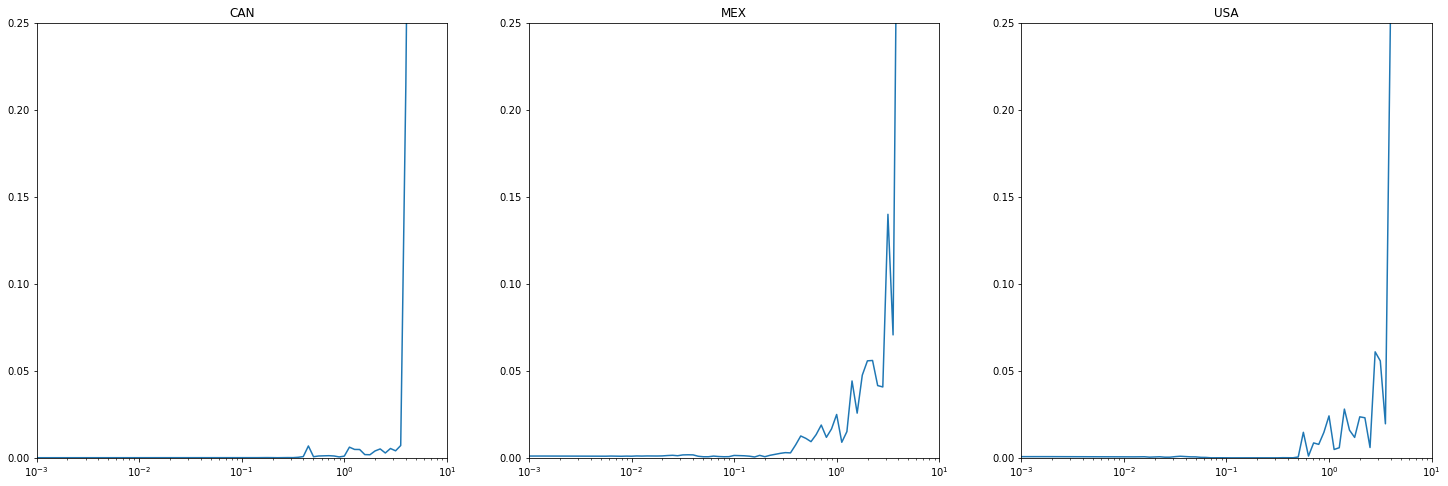

In [16]:
fig, axs = plt.subplots(1, len(grouped), figsize=(25,8))
for (isocode, group), ax in zip(grouped, axs):
    tf.keras.backend.clear_session()
    tf.keras.backend.set_floatx('float64')
    tf.random.set_seed(42)
    np.random.seed(42)
    train_set = windowed_dataset(group['rtfpna'].values, window_size, batch_size, shuffle_buffer_size)
    model = build_compile(1e-8)
    plot_learning_rate_and_loss(model, train_set, ax, isocode, epochs=200)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CAN mae: 0.018400512562936767
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set th

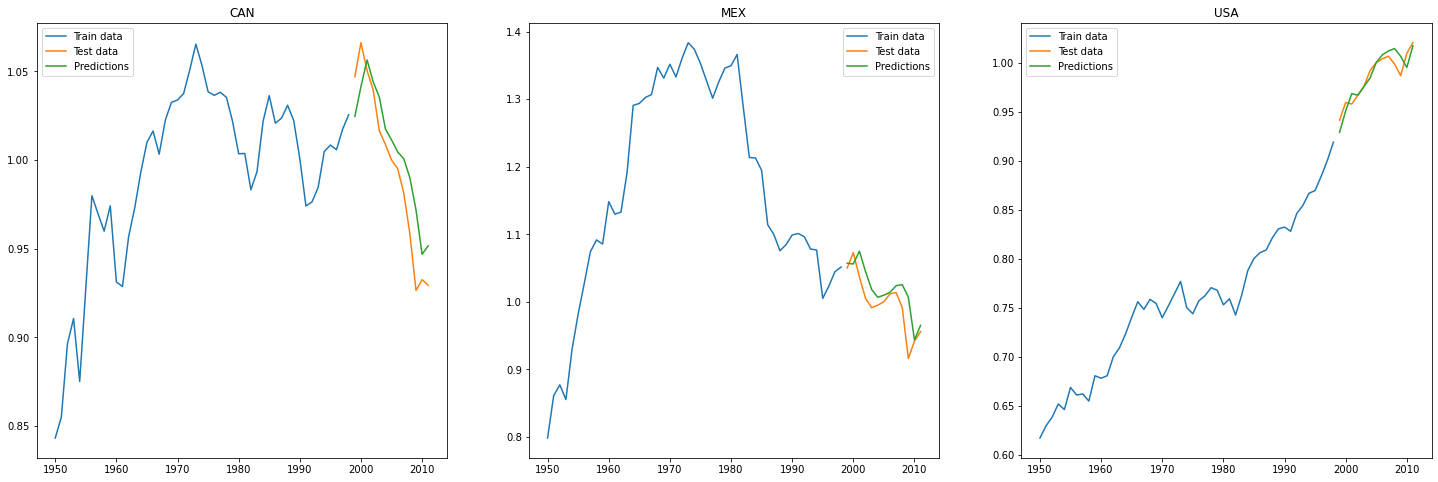

In [17]:
fig, axs = plt.subplots(1, len(grouped), figsize=(25,8))
models = []
learning_rates = [0.03, 0.15, 0.25]
for (isocode, group), ax, lr in zip(grouped, axs, learning_rates):
    tf.keras.backend.clear_session()
    tf.keras.backend.set_floatx('float64')
    tf.random.set_seed(42)
    np.random.seed(42)
    x_train, x_test, split_point = split_data(group['rtfpna'].values)
    year_train, year_test, _ = split_data(group['year'].values)
    train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
    model = build_compile(lr)
    model.fit(train_set, epochs=300, verbose=0)
    models.append(model)
    rnn_forecast = model_forecast(model, group['rtfpna'].values[..., np.newaxis], window_size, batch_size)
    rnn_forecast = rnn_forecast[split_point - window_size:-1, -1, 0]
    ax.plot(year_train, x_train, label='Train data')
    ax.plot(year_test, x_test, label='Test data')
    ax.plot(year_test, rnn_forecast, label='Predictions')
    ax.set_title(isocode)
    ax.legend()
    print(isocode + ' mae: ' + str(tf.keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()))

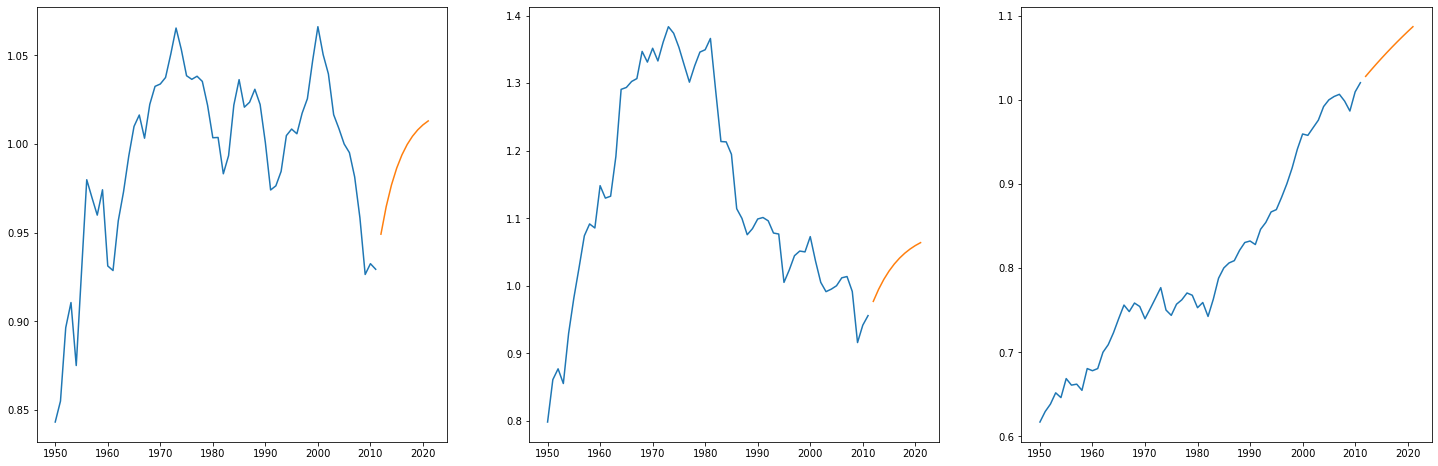

In [18]:
fig, axs = plt.subplots(1, len(grouped), figsize=(25,8))
forecast_length = 10
for (isocode, group), ax, model in zip(grouped, axs, models):
    x = group['rtfpna'].values[-window_size:]
    years = [group['year'].values[-1] + 1 + i for i in range(forecast_length)]
    predictions = []
    for i in range(forecast_length):
        pred = model.predict(x[:, np.newaxis, np.newaxis])
        pred = pred[-1,-1,0]
        predictions.append(pred)
        x = np.append(x[1:], [pred])
    ax.plot(group['year'], group['rtfpna'])
    ax.plot(years, predictions)